# Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\11 Recommendation System\anime.csv')

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12294, 7)

In [5]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [10]:
df.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


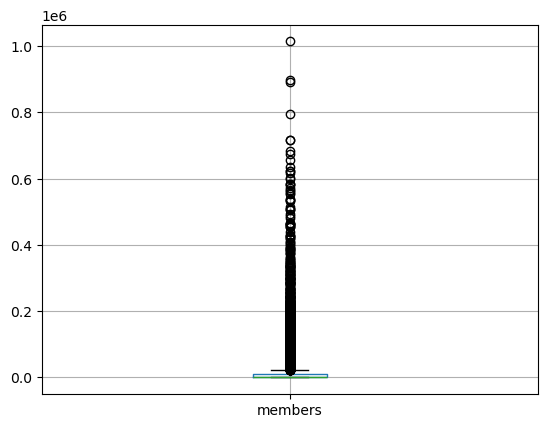

In [11]:
df.boxplot('members')
plt.show();

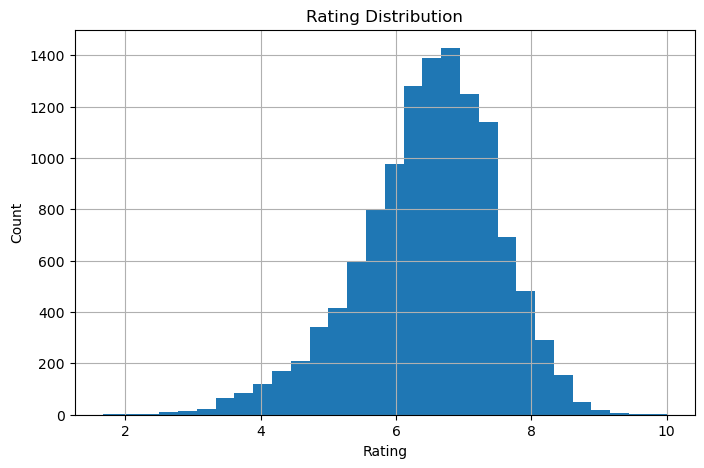

In [12]:
## Plot rating distribution
plt.figure(figsize=(8,5))
df['rating'].hist(bins=30)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show();

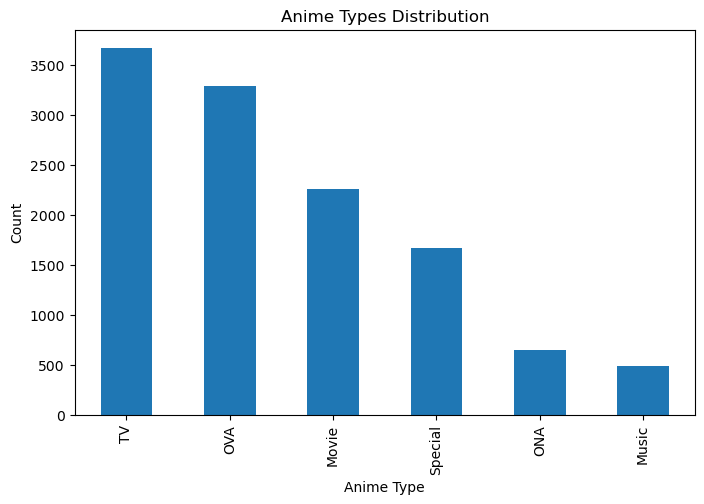

In [13]:
## Plot anime types distribution
plt.figure(figsize=(8,5))
df['type'].value_counts().plot(kind='bar')
plt.title('Anime Types Distribution')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.show();

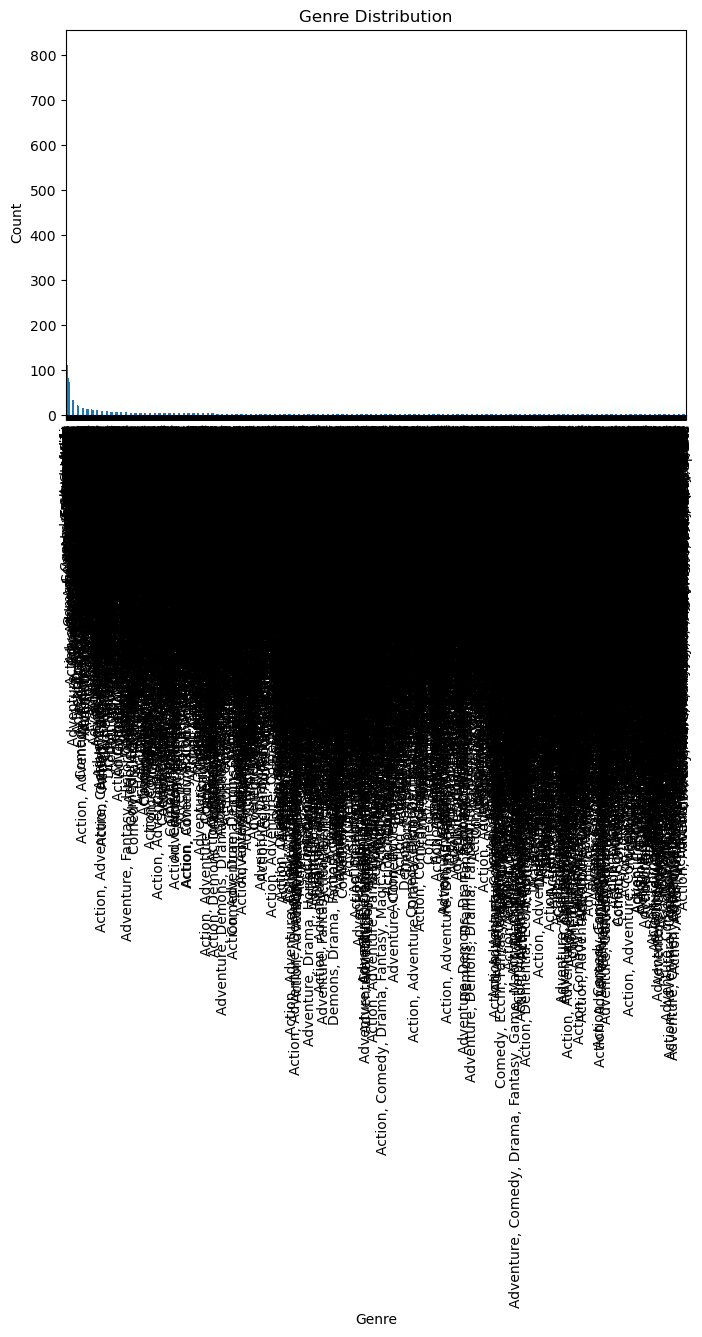

In [14]:
## Plot genre distribution
plt.figure(figsize=(8,5))
df['genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show();

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

In [16]:
mlb=MultiLabelBinarizer()

In [17]:
## preprocess genre
df['genre']=df['genre'].apply(lambda x: x.split(','))

In [18]:
df['genre']

0                [Drama,  Romance,  School,  Supernatural]
1        [Action,  Adventure,  Drama,  Fantasy,  Magic,...
2        [Action,  Comedy,  Historical,  Parody,  Samur...
3                                      [Sci-Fi,  Thriller]
4        [Action,  Comedy,  Historical,  Parody,  Samur...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre, Length: 12017, dtype: object

In [19]:
genre_encoded=mlb.fit_transform(df['genre'])

In [20]:
genre_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
## normalize ratings
df['rating']=(df['rating']-df['rating'].min())/(df['rating'].max()-df['rating'].min())

In [22]:
df['rating']

0        0.924370
1        0.911164
2        0.909964
3        0.900360
4        0.899160
           ...   
12289    0.297719
12290    0.313325
12291    0.385354
12292    0.397359
12293    0.454982
Name: rating, Length: 12017, dtype: float64

In [23]:
## normalize members
df['members']=(df['members']-df['members'].min())/(df['members'].max()-df['members'].min())

In [24]:
df['members']

0        0.197867
1        0.782769
2        0.112683
3        0.664323
4        0.149180
           ...   
12289    0.000196
12290    0.000169
12291    0.000204
12292    0.000161
12293    0.000128
Name: members, Length: 12017, dtype: float64

## Cosine_Similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
cos_sim=cosine_similarity(genre_encoded)

In [27]:
cos_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

### Content based Similarity

In [28]:
## function to get anime recommendations based on a given anime title
def recommend_anime(anime_name,cosine_sim,anime_df):
    
    ## get the index of the anime with the given name
    idx=anime_df[anime_df['name']==anime_name].index[0]
    
    ## get similarity scores for all other anime
    sim_scores=list(enumerate(cosine_sim[idx]))
    
    ## sort by similarity scores
    sim_scores=sorted(sim_scores,key=lambda x: x[1],reverse=True)
    
    ## get the top 10 similar anime
    sim_scores=sim_scores[1:11]
    
    ## get the anime indices
    anime_indices=[i[0] for i in sim_scores]
    
    ## return the top 10 most similar anime
    return anime_df['name'].iloc[anime_indices]

In [29]:
## recommend anime similar to 'Fullmetal Alchemist: Brotherhood'
print(recommend_anime('Fullmetal Alchemist: Brotherhood',cos_sim,df))

200                                  Fullmetal Alchemist
1558       Fullmetal Alchemist: The Sacred Star of Milos
9259                                     Kkomaeosa Ttori
101                           Magi: The Kingdom of Magic
268                         Magi: The Labyrinth of Magic
290                          Magi: Sinbad no Bouken (TV)
461                               Magi: Sinbad no Bouken
795                       Densetsu no Yuusha no Densetsu
879                  Tales of Vesperia: The First Strike
1991    Tsubasa Chronicle: Tori Kago no Kuni no Himegimi
Name: name, dtype: object


### Interview Questions

In [30]:
# 1. Can you explain the difference between user-based and item-based collaborative filtering?
# Item based collaborative filtering finds similarity patterns between items and recommends them to users based on the computed information,
# whereas user based finds similar users and gives them recommendations based on what other people with similar consumption patterns appreciated.
# User based is often harder to scale because of the dynamic nature of users, whereas Items usually don't change much hence easier.

In [31]:
# 2. What is collaborative filtering, and how does it work?
# Collaborative filtering is an information retrieval method that recommends items to users based on how other users with similar preferences
# and behavior have interacted with that item.
# Collaborative filtering uses a matrix to map user behavior for each item in its system. The system then draws values from this matrix to plot as data
# points in a vector space. Various metrics then measure the distance between points as a means of calculating user-user and item-item similarity.